# Building Data Genome - Geographical Regions Load Profiles and Predictions



In [1]:
#Installation

In [2]:
# Import required packages
import pandas as pd
import numpy as np
from google.colab import drive

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')

import gc
import geopandas as gpd
from shapely.geometry import Point, Polygon

pd.set_option('display.max_colwidth', None)

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd

/content


In [5]:
!ls '/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/'

chilledwater_cleaned.csv  hotwater_cleaned.csv	  solar_cleaned.csv  weather.csv
electricity_cleaned.csv   irrigation_cleaned.csv  steam_cleaned.csv
gas_cleaned.csv		  metadata.csv		  water_cleaned.csv


In [6]:
#Import csv data into dataframes
#Energy related
df_solar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/solar_cleaned.csv')
df_water = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/water_cleaned.csv')
df_electricity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/electricity_cleaned.csv')
df_gas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/gas_cleaned.csv')
df_hotwater = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/hotwater_cleaned.csv')
df_irrigation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/irrigation_cleaned.csv')
df_solar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/solar_cleaned.csv')
df_steam = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/steam_cleaned.csv')

#Metadata
df_metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/metadata.csv')

#Weather
df_weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Energy Systems/data/weather.csv')

In [7]:
df_metadata.head(2)

,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
0,Panther_lodging_Dean,Panther,NaN,0.0,Lodging/residential,Residence Hall,508.8,5477.0,28.517689,-81.379039,...,1989.0,NaN,NaN,NaN,NaN,271,NaN,NaN,NaN,NaN
1,Panther_lodging_Shelia,Panther,NaN,0.0,Lodging/residential,Residence Hall,929.0,10000.0,28.517689,-81.379039,...,1992.0,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN


In [8]:
# Download the Natural Earth low-resolution data
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

# Read the shapefile into a GeoDataFrame
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Exclude Antarctica and Fr. S. Antarctic Lands
world = world[(world.NAME != "Antarctica") & (world.NAME != "Fr. S. Antarctic Lands")]

# Coordinate reference system used in this map
world.crs

--2024-12-07 20:24:27--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.218.251.75, 52.92.207.177, 52.92.242.193, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.218.251.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K   410KB/s    in 0.5s    

2024-12-07 20:24:29 (410 KB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_count

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# All the sites
sites = df_metadata[["site_id","lat","lng"]].groupby("site_id").median()

# Converts lat and lng to geometry objects
geometry = [Point(xy) for xy in zip (sites["lng"], sites["lat"])]

# Creates geoDataFrame
geo_sites = gpd.GeoDataFrame(sites, crs = world.crs, geometry = geometry)
geo_sites

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,lat,lng,geometry
site_id,,,
Bear,37.871903,-122.260729,POINT (-122.26073 37.8719)
Bobcat,NaN,NaN,POINT EMPTY
Bull,30.267200,-97.743100,POINT (-97.7431 30.2672)
Cockatoo,42.459837,-76.485292,POINT (-76.48529 42.45984)
Crow,45.387600,-75.696000,POINT (-75.696 45.3876)
Eagle,NaN,NaN,POINT EMPTY
Fox,33.424425,-111.928140,POINT (-111.92814 33.42443)
Gator,NaN,NaN,POINT EMPTY
Hog,44.978782,-93.255398,POINT (-93.2554 44.97878)


As can be seen below, we have buildings situated in very distinct geographical regions, with their own building regulations and weather conditions. We would like to know if there are some significant differences between them visible via time series analysis.

<Axes: >

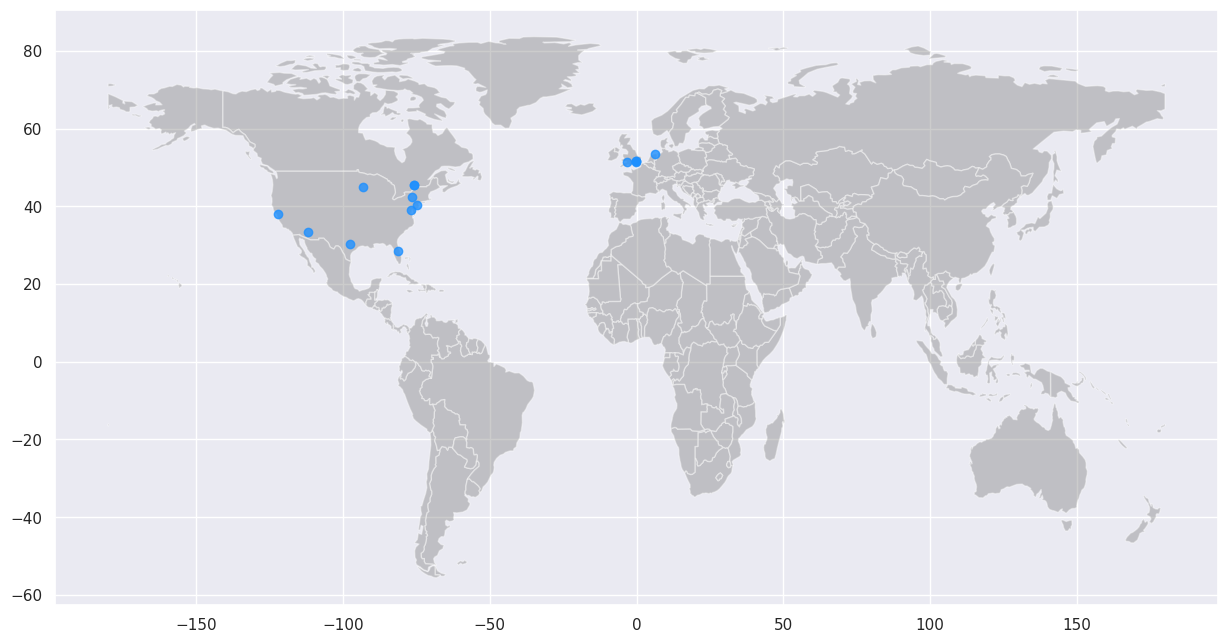

In [10]:
# Plot
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax = ax, alpha = 0.4, color = "grey")
geo_sites.plot(ax = ax, alpha = 0.8, color = "dodgerblue")

## Group by East Coast, West Coast and Europe

In [11]:
# Define regions
east_coast_bbox = (-80, 25, -65, 45)  # (min_lon, min_lat, max_lon, max_lat)
west_coast_bbox = (-125, 32, -114, 49)
europe_bbox = (-10, 35, 30, 70)

In [45]:
#function to assign buildings to each region:
def assign_region(row):
    lon, lat = row['lng'], row['lat']
    if east_coast_bbox[0] <= lon <= east_coast_bbox[2] and east_coast_bbox[1] <= lat <= east_coast_bbox[3]:
        return 'East Coast'
    elif west_coast_bbox[0] <= lon <= west_coast_bbox[2] and west_coast_bbox[1] <= lat <= west_coast_bbox[3]:
        return 'West Coast'
    elif europe_bbox[0] <= lon <= europe_bbox[2] and europe_bbox[1] <= lat <= europe_bbox[3]:
        return 'Europe'
    else:
        return 'Other'

In [ ]:
#Create a new column named "region" and populate it accordingly by applying the above-defined function:
df_metadata['region'] = df_metadata.apply(assign_region, axis=1)

In [46]:
grouped_sites = geo_sites.groupby('region')

# Example: Get the number of sites in each region
region_counts = grouped_sites.size()
print(region_counts)

KeyError: 'region'

## Merge the data

## Run the same features frequencies plots as in the authors' notebooks